# Support Vector Machine (SVM)

The maximum margin classifier as the solution of a **quadratic programming** problem


## First cook up some data to test it on:


In [11]:
from numpy import *
d = 2
n = 30
x = random.rand(d,n)
X = empty((d+1,n))
X[0,:] = 1
X[1:,:] = x
W = array([-1,-2,3.])
y = sign(dot(W,X))
# let's open up a little space between the classes
halfgap = 0.05
X[-1,y>0] += halfgap
X[-1,y<0] -= halfgap
xp = X[1:,y>0]
xm = X[1:,y<0] 


In [12]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


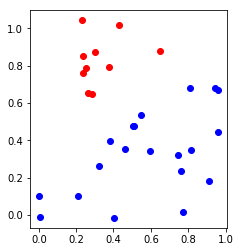

In [13]:
subplot(111,aspect=1)
plot(xp[0],xp[1],'ro')
plot(xm[0],xm[1],'bo');
# We are given X and y ONLY!!

def drawline(W,color='g',alpha=1.):
    plot([0,1],[-W[0]/W[2],-(W[0]+W[1])/W[2]],color=color,alpha=alpha)
    

In [14]:
x

array([[ 0.37948261,  0.26368053,  0.77329343,  0.00705967,  0.91108966,
         0.81639995,  0.43079722,  0.28373385,  0.96029526,  0.30263398,
         0.40288347,  0.23519332,  0.81069208,  0.74725247,  0.50601166,
         0.23812116,  0.94262789,  0.2121248 ,  0.64764475,  0.23045994,
         0.54902053,  0.9579257 ,  0.32233416,  0.25466572,  0.00144753,
         0.7620377 ,  0.45965321,  0.51037146,  0.59409507,  0.37620209],
       [ 0.4475895 ,  0.6054728 ,  0.06865211,  0.04062139,  0.23484831,
         0.39670707,  0.96937925,  0.59859495,  0.71719583,  0.82071086,
         0.03454199,  0.80154521,  0.72888295,  0.37345218,  0.52653237,
         0.71031819,  0.73077613,  0.15085573,  0.82732658,  0.99297661,
         0.58397624,  0.49479998,  0.31023866,  0.73891164,  0.15176565,
         0.28432721,  0.40347752,  0.52854065,  0.39097946,  0.74188984]])

In [15]:
y

array([-1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1.])

## Prep the parameters for cvxopt solver


In [16]:
from cvxopt import matrix,solvers

P = eye(d+1)
P[0,0] = 0
P = matrix(P)

q = zeros(d+1)
q = matrix(q)

G = (-X*y).T
G = matrix(G)

h = -ones(n)
h = matrix(h)